In [1]:
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
import pandas as pd
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
df=pd.concat([X,y],axis=1)
df.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Targets'],
      dtype='object')

In [5]:
df.shape

(150, 5)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df.describe()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# 품종을 기준으로 한 평균값들
df.groupby("Targets").mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Targets,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [9]:
df["Targets"].value_counts()

0    50
1    50
2    50
Name: Targets, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0: setosa, 1: versicolor, 2: virginica )')

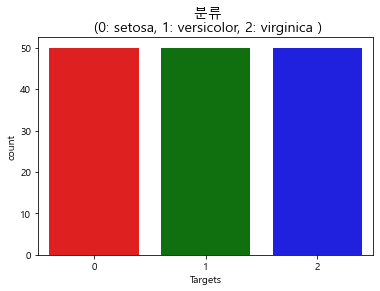

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["red", "green", "blue"]
sns.countplot('Targets', data=df, palette=colors)
plt.title(' 분류\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)


array([[<AxesSubplot:xlabel='Sepal_Length', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Sepal_Width', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Sepal_Length'>,
        <AxesSubplot:xlabel='Targets', ylabel='Sepal_Length'>],
       [<AxesSubplot:xlabel='Sepal_Length', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Sepal_Width', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Targets', ylabel='Sepal_Width'>],
       [<AxesSubplot:xlabel='Sepal_Length', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Sepal_Width', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Targets', ylabel='Petal_Length'>],
   

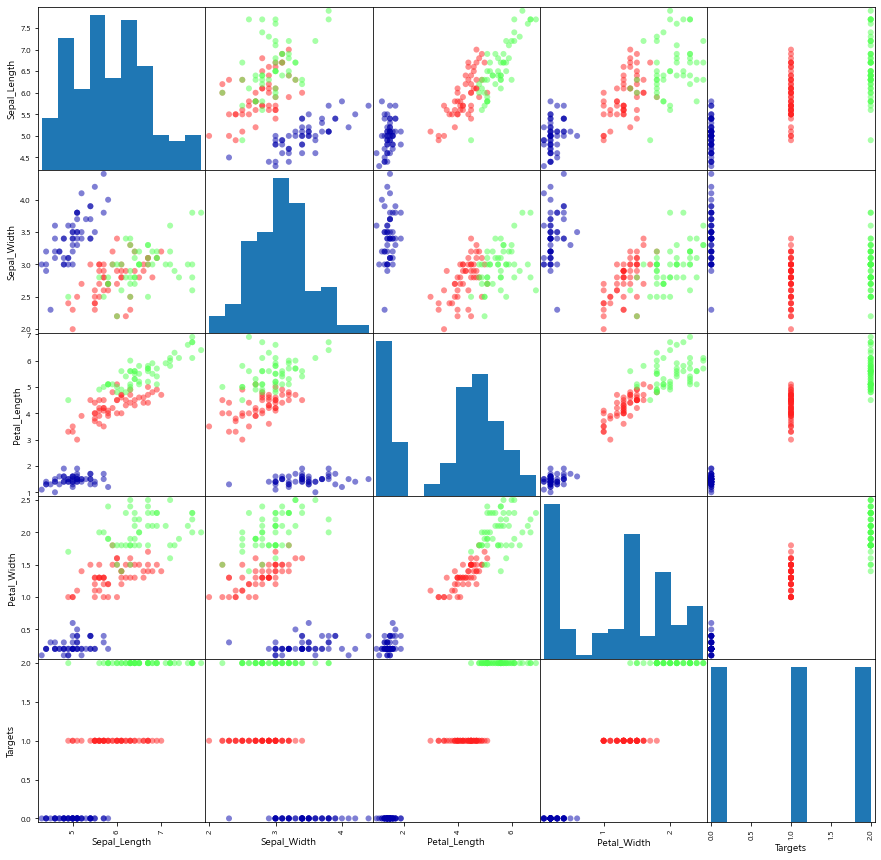

In [19]:
import mglearn
# 산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=iris.target, figsize=(15, 15),marker='o', cmap=mglearn.cm3)
# 세 클래스가 비교적 잘 구분되고 있으므로 기계학습하기에 적합한 데이터임

Text(0.5, 1.0, '꽃잎')

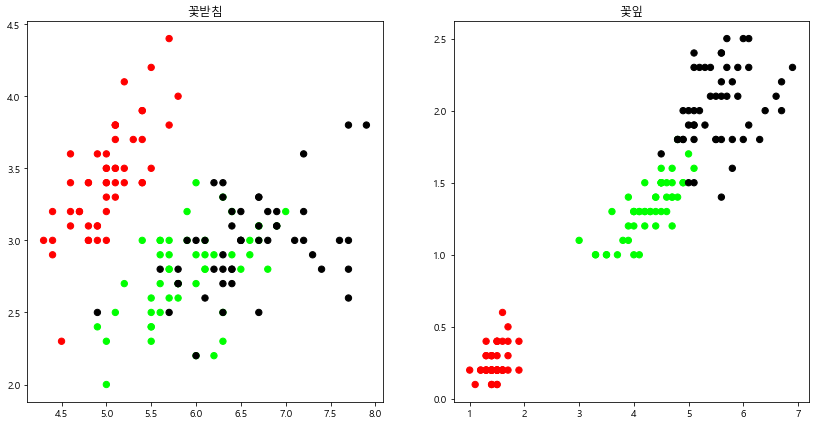

In [12]:
import numpy as np
# 그래프 사이즈
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 꽃받침 기준 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('꽃받침') 
# 꽃잎 기준 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('꽃잎')

In [13]:
# KMeans Cluster 모델 생성 (클러스터 3개)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=0)
model.fit(X)

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [14]:
# clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '클러스터링 결과')

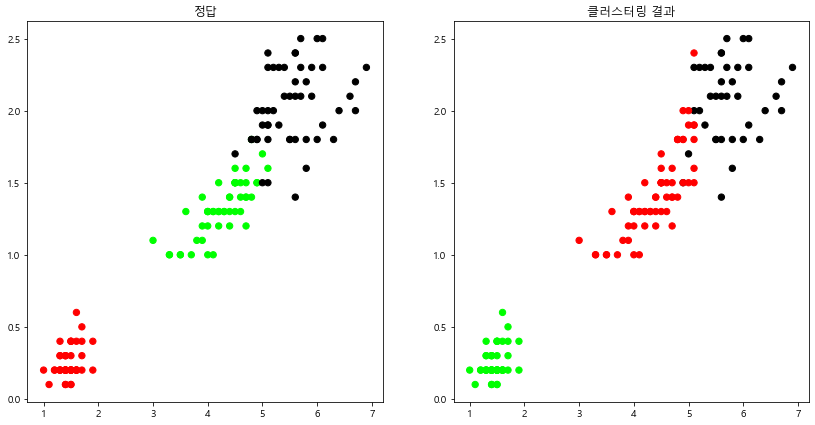

In [15]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# ( ) 그래프 출력 정답
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답') 
# ( ) 그래프 출력 클러스터링
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('클러스터링 결과') 
# clustering (label 은 비교적 잘 되었으나 색상이 다름 이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [16]:
# label 순번 변경
# [0,1,2]에서 [1,0,2]로 변경 ( 0과 1을 서로 바꿈)
pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, '클러스터링 결과')

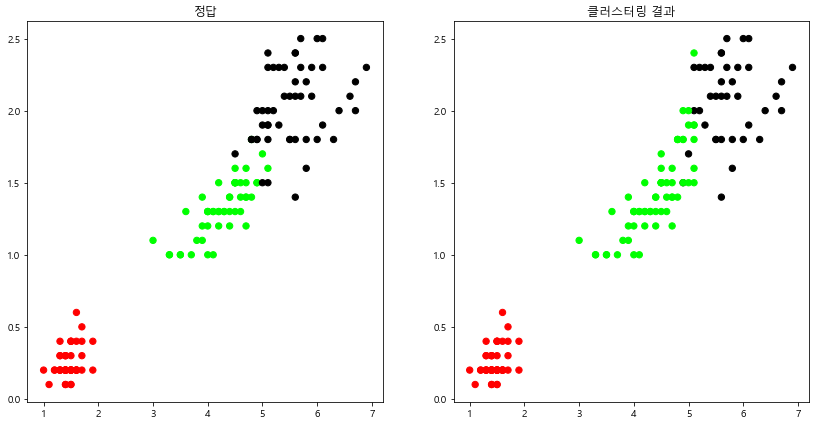

In [17]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))
# 색상 배열
colormap = np.array(['red', 'lime', 'black'])
# 그래프 출력 (정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답') 
# 그래프 출력 (예측)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)
plt.title('클러스터링 결과')

c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

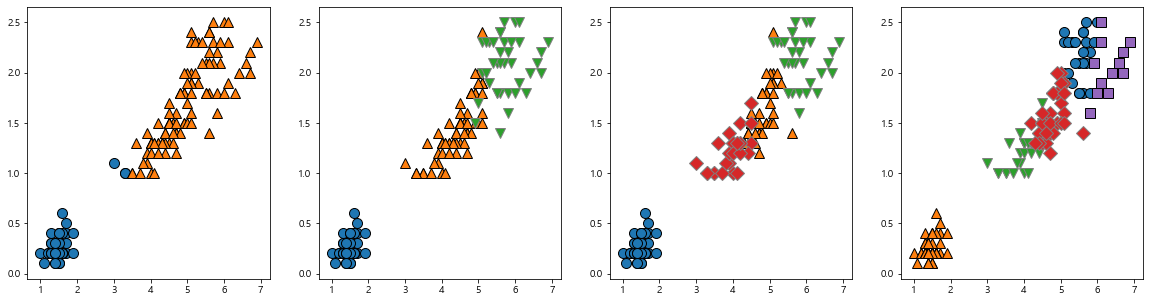

In [18]:
from matplotlib import pyplot as plt
# 같은 데이터라도 값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Petal_Length"],
    X["Petal_Width"], lbls, ax=axes[idx])
    idx+=1

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

In [21]:
from sklearn.cluster import KMeans
# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# k-means++ , random 기본값 랜덤으로 선택
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_) #중심좌표

[[ 0.00000000e+00  1.66533454e-16  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   2.60208521e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   1.30104261e-18  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  1.38777878e-17
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -5.55111512e-17
   1.08420217e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

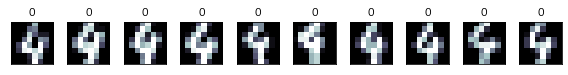

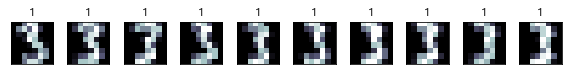

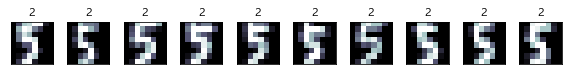

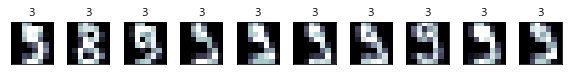

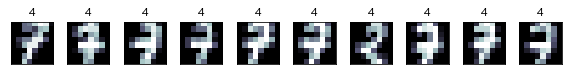

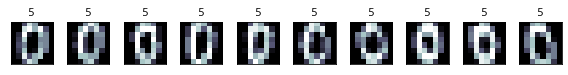

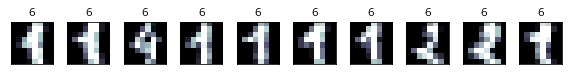

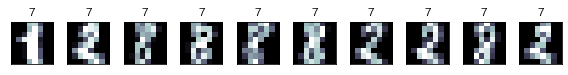

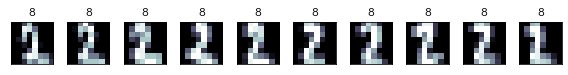

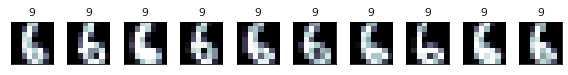

In [22]:
import matplotlib.pyplot as plt
def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
for i in range(10):
    show_cluster(digits.images, y_pred, i)
#이미지 위의 숫자는 군집 번호이므로 실제 번호와 일치하지 않음

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]], dtype=int64)

In [24]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(digits.data, y_pred)

0.18251916424600556

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


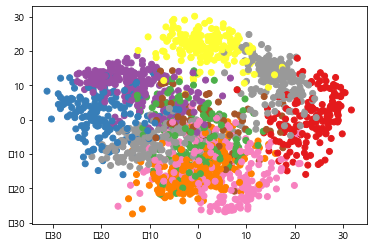

In [25]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()